In [53]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [54]:
billboard = pd.read_csv('Data/Data/billboard.csv')

# List of contents:
   1. Original dataset info
   2. Evolution of ranking of any given song
   3. The dataset after tidy
   4. Changing the week column
   5. Convert date.entered to datetime format
   6. Create a new "date" column, based on the date.entered and the week number
   7. Splitting the dataset to two dataframes, to reduce the redundancy
   8. The worst and best songs in the first week
   9. Which song(s) have been in top 10 more often
   10. Sorted average rank for each song
   11. Best song of each artist based on average rank
   12. A list of the songs by each artist, sorted by average rank

# 1. Original dataset info

In [55]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
billboard.shape

(317, 81)

In [57]:
billboard.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

# 2. Evolution of ranking of any given song

Text(0.5, 0, 'Week')

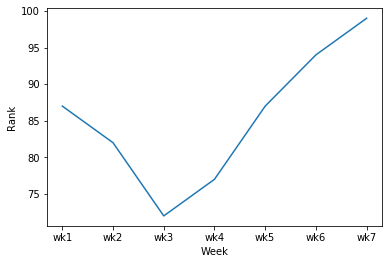

In [58]:
ax = billboard.loc[0,'wk1' :'wk76'].plot()
ax.set_ylabel("Rank")
ax.set_xlabel("Week")

In [59]:
# Melting
id_vars = ["year",
           "artist",
           "track",
           "time",
           "date.entered"]

billboard = pd.melt(frame=billboard,id_vars=id_vars, var_name="week", value_name="rank")

# 3. The dataset after tidy

In [60]:
billboard.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [61]:
billboard.shape

(24092, 7)

In [62]:
billboard.describe()

,year,rank
count,24092.0,5307.000000
mean,2000.0,51.052384
std,0.0,28.966198
min,2000.0,1.000000
25%,2000.0,26.000000
50%,2000.0,51.000000
75%,2000.0,76.000000
max,2000.0,100.000000


In [63]:
billboard[billboard['artist']=="2 Pac"].head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0


In [64]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          24092 non-null  int64  
 1   artist        24092 non-null  object 
 2   track         24092 non-null  object 
 3   time          24092 non-null  object 
 4   date.entered  24092 non-null  object 
 5   week          24092 non-null  object 
 6   rank          5307 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


# 4. Changing the week column


In [65]:
billboard["week"] = billboard['week'].str.extract('(\d+)', expand=False).astype(int)


In [66]:
# Cleaning out unnecessary rows
billboard = billboard.dropna()

In [67]:
billboard.shape

(5307, 7)

In [68]:
billboard.head()

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0


# 5. Convert date.entered to datetime format

In [73]:
import datetime
from pandas.tseries.offsets import DateOffset

In [74]:
#Change date into Datetime objects
billboard['date'] = pd.to_datetime(billboard['date.entered'])

In [75]:
#Date arithmetic applying timedelta obtaining the correct date in ranking in week 1, 2
billboard['date'][0] + pd.Timedelta('7 days')

Timestamp('2000-03-04 00:00:00')

# 6. Create  a new "date" column, based on the date.entered and the week number

In [76]:
billboard['date'] = pd.to_datetime(billboard['date.entered']) + pd.to_timedelta(billboard['week'], unit='w')  - pd.DateOffset(weeks=1)

In [78]:
billboard.tail(10)

,year,artist,track,time,date.entered,week,rank,date
18882,2000,Lonestar,Amazed,4:25,1999-06-05,60,37.0,2000-07-22
19082,2000,Creed,Higher,5:16,1999-09-11,61,43.0,2000-11-04
19199,2000,Lonestar,Amazed,4:25,1999-06-05,61,42.0,2000-07-29
19399,2000,Creed,Higher,5:16,1999-09-11,62,47.0,2000-11-11
19516,2000,Lonestar,Amazed,4:25,1999-06-05,62,42.0,2000-08-05
19716,2000,Creed,Higher,5:16,1999-09-11,63,50.0,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45.0,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,64,50.0,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50.0,2000-08-19
20350,2000,Creed,Higher,5:16,1999-09-11,65,49.0,2000-12-02


In [79]:
billboard = billboard.sort_values(ascending=True, by=["year","artist","track","week","rank"])

In [80]:
billboard.head()

,year,artist,track,time,date.entered,week,rank,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0,2000-02-26
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,2,82.0,2000-03-04
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,3,72.0,2000-03-11
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,4,77.0,2000-03-18
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,5,87.0,2000-03-25


In [81]:
# Assigning the tidy dataset to a variable for future usage
billboard_df = billboard

In [83]:
billboard_df.drop(['date.entered','year'], axis=1, inplace=True)

In [84]:
billboard.shape

(5307, 6)

In [85]:
billboard_df.head()

,artist,track,time,week,rank,date
0,2 Pac,Baby Don't Cry (Keep...,4:22,1,87.0,2000-02-26
317,2 Pac,Baby Don't Cry (Keep...,4:22,2,82.0,2000-03-04
634,2 Pac,Baby Don't Cry (Keep...,4:22,3,72.0,2000-03-11
951,2 Pac,Baby Don't Cry (Keep...,4:22,4,77.0,2000-03-18
1268,2 Pac,Baby Don't Cry (Keep...,4:22,5,87.0,2000-03-25


# 7. Splitting the dataset to two dataframes, to reduce the redundancy

There is still a lot of repetition of the song details: the track name, time. For this reason, this dataset is still not completely tidy .

Multiple observational units (the song and its rank) in a single table.

In [110]:
songs_cols = ["artist", "track", "time"]
songs = billboard_df[songs_cols].drop_duplicates()
songs.reset_index(drop=True)

songs["song_id"] = songs.index
songs.head(10)

,artist,track,time,song_id
0,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2Ge+her,The Hardest Part Of ...,3:15,1
2,3 Doors Down,Kryptonite,3:53,2
3,3 Doors Down,Loser,4:24,3
4,504 Boyz,Wobble Wobble,3:35,4
5,98^0,Give Me Just One Nig...,3:24,5
6,A*Teens,Dancing Queen,3:44,6
7,Aaliyah,I Don't Wanna,4:15,7
8,Aaliyah,Try Again,4:03,8
9,"Adams, Yolanda",Open My Heart,5:30,9


In [111]:
songs.head()

,artist,track,time,song_id
0,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2Ge+her,The Hardest Part Of ...,3:15,1
2,3 Doors Down,Kryptonite,3:53,2
3,3 Doors Down,Loser,4:24,3
4,504 Boyz,Wobble Wobble,3:35,4


We’ll then create a ranks table which only contains the song_id, date and the rank.

In [115]:
ranks = pd.merge(billboard_df, songs, on=["artist", "track", "time"])
ranks = ranks[["song_id", "date","rank",'week']]

ranks.head(10)

,song_id,date,rank,week
0,0,2000-02-26,87.0,1
1,0,2000-03-04,82.0,2
2,0,2000-03-11,72.0,3
3,0,2000-03-18,77.0,4
4,0,2000-03-25,87.0,5
5,0,2000-04-01,94.0,6
6,0,2000-04-08,99.0,7
7,1,2000-09-02,91.0,1
8,1,2000-09-09,87.0,2
9,1,2000-09-16,92.0,3


# 8. The worst and best songs in the first week

In [116]:
ranks.loc[ranks[ranks.week == 1]['rank'].idxmax()]

song_id                     86
date       2000-02-12 00:00:00
rank                       100
week                         1
Name: 1551, dtype: object

In [117]:
songs.query('song_id == 86')

,artist,track,time,song_id
86,Drama,"Left, Right, Left",3:37,86


In [118]:
ranks.loc[ranks[ranks.week == 1]['rank'].idxmin()]

song_id                    252
date       2000-02-12 00:00:00
rank                        15
week                         1
Name: 4253, dtype: object

In [119]:
songs.query('song_id == 252')

,artist,track,time,song_id
252,Santana,"Maria, Maria",4:18,252


# 9. Which song(s) have been in top 10 more often

In [128]:
filtered_rank = ranks.loc[ranks['rank'] <= 10] #All songs that have had ranks below 10
most_frequent = filtered_rank['song_id'].mode()
print(most_frequent)
songs.query('song_id == 121')

0    121
1    300
dtype: int64


,artist,track,time,song_id
121,"Hill, Faith",Breathe,4:04,121


In [129]:
songs.query('song_id == 300')

,artist,track,time,song_id
300,Vertical Horizon,Everything You Want,4:01,300


# 10. Sorted average rank for each song

In [137]:
avg_sorted = ranks.groupby('song_id').mean().sort_values(by=['rank'])['rank']
avg_sorted

song_id
252    10.500000
191    13.458333
218    14.260870
91     14.333333
74     14.821429
         ...    
165    98.500000
89     99.000000
267    99.000000
105    99.000000
315    99.000000
Name: rank, Length: 317, dtype: float64

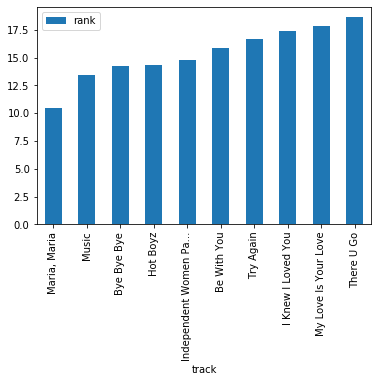

In [141]:
pd.merge(avg_sorted, songs, on=['song_id']).head(10).plot.bar(x='track', y='rank')

# 11. Best song of each artist based on average rank

In [144]:
merged = pd.merge(avg_sorted, songs, on=['song_id'])
merged.groupby('artist').min()

,song_id,rank,track,time
artist,,,,
2 Pac,0,85.428571,Baby Don't Cry (Keep...,4:22
2Ge+her,1,90.000000,The Hardest Part Of ...,3:15
3 Doors Down,2,26.471698,Kryptonite,3:53
504 Boyz,4,56.222222,Wobble Wobble,3:35
98^0,5,37.650000,Give Me Just One Nig...,3:24
...,...,...,...,...
Yankee Grey,312,83.125000,Another Nine Minutes,3:10
"Yearwood, Trisha",313,84.166667,Real Live Woman,3:55
Ying Yang Twins,314,88.857143,Whistle While You Tw...,4:19


# 12. A list of the songs by each artist, sorted by average rank

In [145]:
merged.sort_values(by=['artist', 'rank'])

,song_id,rank,artist,track,time
257,0,85.428571,2 Pac,Baby Don't Cry (Keep...,4:22
280,1,90.000000,2Ge+her,The Hardest Part Of ...,3:15
37,2,26.471698,3 Doors Down,Kryptonite,3:53
170,3,67.100000,3 Doors Down,Loser,4:24
126,4,56.222222,504 Boyz,Wobble Wobble,3:35
...,...,...,...,...,...
247,312,83.125000,Yankee Grey,Another Nine Minutes,3:10
248,313,84.166667,"Yearwood, Trisha",Real Live Woman,3:55
275,314,88.857143,Ying Yang Twins,Whistle While You Tw...,4:19
316,315,99.000000,Zombie Nation,Kernkraft 400,3:30
